In [2]:
!pip install pandas
import pandas as pd

In [3]:
df= pd.read_csv("atlantis_citizens_final.csv")

In [4]:
df.head(10)

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2
5,CIT_7475,Seaweed,Mariana Plaza,Warrior,6173.0,911.0,47.0,Sea Scooter,Deep Trench,e4023d89
6,CIT_17545,Exotic Imports,Coral Slums,Scribe,1506.0,100.0,51.0,No Vehicle,Mariana Plaza,6eabb698
7,CIT_5234,Exotic Imports,The Golden Reef,Warrior,19054.0,4314.0,47.0,Submarine,Coral Slums,ada3f024
8,CIT_10281,Seafood,Coral Slums,Miner,1890.0,NaN,45.0,Sea Scooter,Coral Slums,7b32810b
9,CIT_14760,Seafood,The Golden Reef,Miner,2597.0,NaN,43.0,Fin Bicycle,Coral Slums,addf2367


In [5]:
# Creating a new column which stores 0 or 1 depending on whether the citizen commutes out for work
df['Commute_Out'] = (df['District_Name'] != df['Work_District']).astype(int)

In [6]:
df.head()

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash,Commute_Out
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce,1
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef,1
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296,1
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e,0
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2,0


In [7]:
#dataframe that contains percentage of citizens commuting out district-wise
commute_out = df.groupby('District_Name')['Commute_Out'].mean().reset_index()
commute_out['Commute_Out_Perc'] = commute_out['Commute_Out']*100
commute_out.head()

,District_Name,Commute_Out,Commute_Out_Perc
0,Coral Slums,0.664747,66.474728
1,Deep Trench,0.632666,63.266610
2,Mariana Plaza,0.632457,63.245670
3,The Golden Reef,0.728747,72.874662


In [8]:
#dataframe that contains percentage of citizens commuting out, grouped by occupation
commute_out_occ = df.groupby('Occupation')['Commute_Out'].mean().reset_index()
commute_out_occ['Commute_Out_Perc'] = commute_out_occ['Commute_Out']*100
commute_out_occ

,Occupation,Commute_Out,Commute_Out_Perc
0,Fisher,0.694834,69.483418
1,Merchant,0.676096,67.609618
2,Miner,0.701783,70.178336
3,Scribe,0.608092,60.809203
4,Warrior,0.651374,65.137355


In [9]:
#sorting data to compare citizens involved in which occupation commute out more
commute_out_occ = commute_out_occ.sort_values(by='Commute_Out_Perc', ascending=False)
commute_out_occ

,Occupation,Commute_Out,Commute_Out_Perc
2,Miner,0.701783,70.178336
0,Fisher,0.694834,69.483418
1,Merchant,0.676096,67.609618
4,Warrior,0.651374,65.137355
3,Scribe,0.608092,60.809203


From the above sorted dataframe, it is clear that a higher percentage of citizens involved in mining commute out more, and a comparitively smaller percentage of scribes commute out

In [10]:
#dataframe combining both the district name and occupation datas
df_dist_occ = df.groupby(['District_Name','Occupation'])['Commute_Out'].mean().reset_index()
df_dist_occ=df_dist_occ.sort_values(by='Commute_Out', ascending=False)
df_dist_occ.head(20)

,District_Name,Occupation,Commute_Out
12,Mariana Plaza,Miner,0.922840
8,Deep Trench,Scribe,0.915638
18,The Golden Reef,Scribe,0.914530
1,Coral Slums,Merchant,0.907850
10,Mariana Plaza,Fisher,0.898089
17,The Golden Reef,Miner,0.897013
14,Mariana Plaza,Warrior,0.895082
3,Coral Slums,Scribe,0.889610
6,Deep Trench,Merchant,0.885659
4,Coral Slums,Warrior,0.769231


In [11]:
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


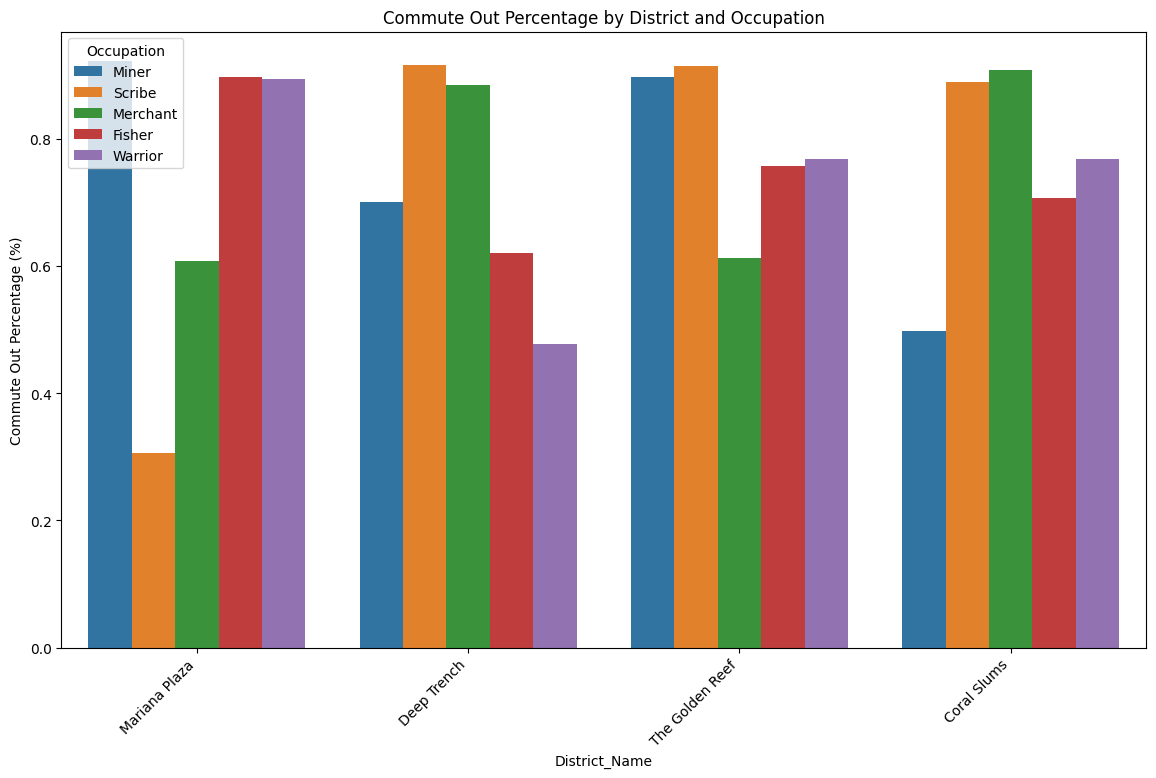

In [12]:

plt.figure(figsize=(14,8))
sns.barplot(
    data=df_dist_occ,
    x='District_Name',
    y='Commute_Out',
    hue = 'Occupation'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Commute Out Percentage (%)")
plt.title("Commute Out Percentage by District and Occupation")
plt.legend(title="Occupation")
plt.show()


Conclusions-
1) Mariana Plaza has job oppurtunities for scribes, indicated by smaller percentage of scribes commuting to other districts, but this district has no mines indicated by high percentage of miners commuting to other distrcts.
2) Deep Trench has very few job oppurtunities for scribes. However a smaller percentage of warriors commute to other districts, suggesting a higher need for warriors in this district compared to other districts
3) The Golden Reef has few mines, and fewer job oppurtunities for scribes. However fewer merchants commute to other districts, in comparision to other districts, suggesting more job oppurtunites (markets) for merchants
4) Coral Slums has the highest percentage of merchants commuting (suggesting presence of fewer marketplaces), however this district might have the most number of mines as suggested by the lowest percentage of miners commuting to other districts

In [13]:
wealth_df = df.groupby('District_Name')['Wealth_Index'].mean().reset_index()
wealth_df.head()

,District_Name,Wealth_Index
0,Coral Slums,3371.414207
1,Deep Trench,4806.795825
2,Mariana Plaza,8535.553804
3,The Golden Reef,18726.909656


In [14]:
wealth_df=wealth_df.sort_values(by='Wealth_Index', ascending=False)
wealth_df.head()

,District_Name,Wealth_Index
3,The Golden Reef,18726.909656
2,Mariana Plaza,8535.553804
1,Deep Trench,4806.795825
0,Coral Slums,3371.414207


The wealthiest district is The Golden Reef with the average Wealth_Index of a citizen = 18726.91, while the poorest district is Coral Slums with average Wealth_Index of a citizen = 3371.4.
Thus an average citizen is the wealthiest district is approximately 5.555 times wealthier than an average citizen in the poorest district

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen_ID        15751 non-null  object 
 1   Diet_Type         15751 non-null  object 
 2   District_Name     15751 non-null  object 
 3   Occupation        15751 non-null  object 
 4   Wealth_Index      14696 non-null  float64
 5   House_Size_sq_ft  14554 non-null  float64
 6   Life_Expectancy   15137 non-null  float64
 7   Vehicle_Owned     15751 non-null  object 
 8   Work_District     15751 non-null  object 
 9   Bio_Hash          15751 non-null  object 
 10  Commute_Out       15751 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [16]:
#creating a new dataframe by dropping the rows with NaN values from df
print("Shape of df = ",df.shape)
df_not_nan= df.dropna()
print("Shape of df_not_nan = ",df_not_nan.shape)


Shape of df =  (15751, 11)
Shape of df_not_nan =  (13043, 11)


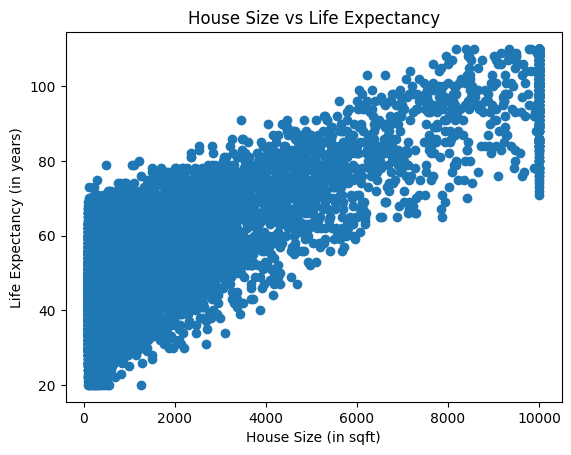

In [17]:
plt.scatter(data = df_not_nan, x='House_Size_sq_ft', y='Life_Expectancy')
plt.xlabel('House Size (in sqft)')
plt.ylabel('Life Expectancy (in years)')
plt.title("House Size vs Life Expectancy")
plt.show()

Overall, we see a slight relation between House zise and Life Expectancy. An approximate increase in life expectancy is seen and house size in increases. Although the increase is not evident initially, over a huge range of House Size from 0 to 10000 sqft, the overall life expectancy shifts higher.

In [18]:
#relation between diet type and occupation
pivot = pd.pivot_table(df_not_nan, index='Diet_Type', columns='Occupation', values='Citizen_ID', aggfunc='count', fill_value=0)
print(pivot)

Occupation      Fisher  Merchant  Miner  Scribe  Warrior
Diet_Type                                               
Exotic Imports     898      1001    827     681      922
Seafood            852       972    827     702     1013
Seaweed            870       936    861     697      984


No particular conclusions can be drawn, but it is seen that a larger number of merchants prefer exotic imports, suggesting a relation between income and diet type. 

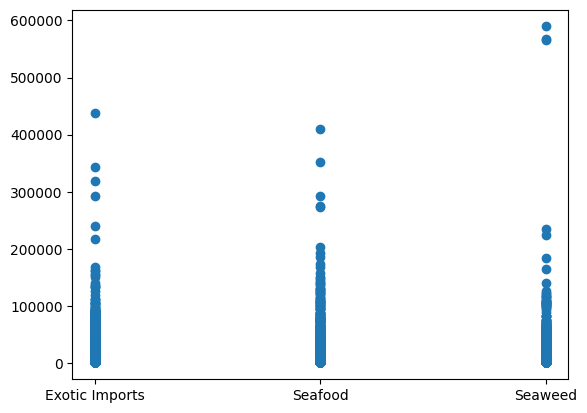

In [19]:
plt.scatter(data = df_not_nan, x='Diet_Type', y='Wealth_Index')
plt.show()

In this plot, we find a few outliers in the each category. Thus, we need to eliminate the outliers, in order to get the right mean

C:\Users\medha\AppData\Local\Temp\ipykernel_25488\244444243.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_not_nan.groupby('Diet_Type', group_keys=False).apply(remove_outliers)


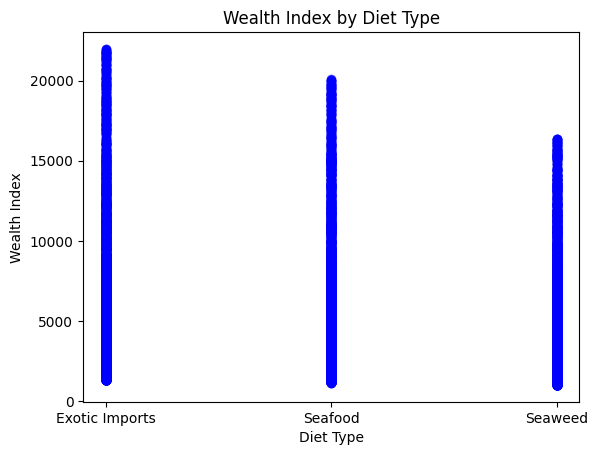

In [20]:
def remove_outliers(group):
    Q1 = group['Wealth_Index'].quantile(0.25)
    Q3 = group['Wealth_Index'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Wealth_Index'] >= lower) & (group['Wealth_Index'] <= upper)]

df_clean = df_not_nan.groupby('Diet_Type', group_keys=False).apply(remove_outliers)
plt.scatter(df_clean['Diet_Type'], df_clean['Wealth_Index'], alpha=0.6, color='blue')
plt.xlabel("Diet Type")
plt.ylabel("Wealth Index")
plt.title("Wealth Index by Diet Type")
plt.show()

In [21]:
df_diet_income = df_clean.groupby('Diet_Type')['Wealth_Index'].mean().reset_index()
df_diet_income.head()

,Diet_Type,Wealth_Index
0,Exotic Imports,5601.000517
1,Seafood,4998.257482
2,Seaweed,4199.734262


Although its not mandatory for the financial income to affect the diet type, it is seen that the wealth index of an average citizen who consumes exotic imports is higher and that of a citizen who consumes seaweed. Thus the wealthier citizens of Atlantis seem to prefer exotic imports. No citizen with wealth index moree than approximately 17000 has chosen seaweed for their diet. All citizens with a wealth_index of approximately 20000 choose exotic imports.

Significance of Bio_Hash with Occupation-
    The bio_hash values seem to be hexadecimal values, (combination of 0 to 9 and a to f). So first we convert these hexadecimal values to their equivalent decimal values

In [22]:
df['Bio_Hash_Decimal']=df['Bio_Hash'].apply(lambda x: int(x, 16))
df.head(20)

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash,Commute_Out,Bio_Hash_Decimal
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce,1,3088890062
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef,1,1928629999
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296,1,180216470
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e,0,2153118878
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2,0,3346541026
5,CIT_7475,Seaweed,Mariana Plaza,Warrior,6173.0,911.0,47.0,Sea Scooter,Deep Trench,e4023d89,1,3825352073
6,CIT_17545,Exotic Imports,Coral Slums,Scribe,1506.0,100.0,51.0,No Vehicle,Mariana Plaza,6eabb698,1,1856747160
7,CIT_5234,Exotic Imports,The Golden Reef,Warrior,19054.0,4314.0,47.0,Submarine,Coral Slums,ada3f024,1,2913202212
8,CIT_10281,Seafood,Coral Slums,Miner,1890.0,NaN,45.0,Sea Scooter,Coral Slums,7b32810b,0,2066907403
9,CIT_14760,Seafood,The Golden Reef,Miner,2597.0,NaN,43.0,Fin Bicycle,Coral Slums,addf2367,1,2917081959


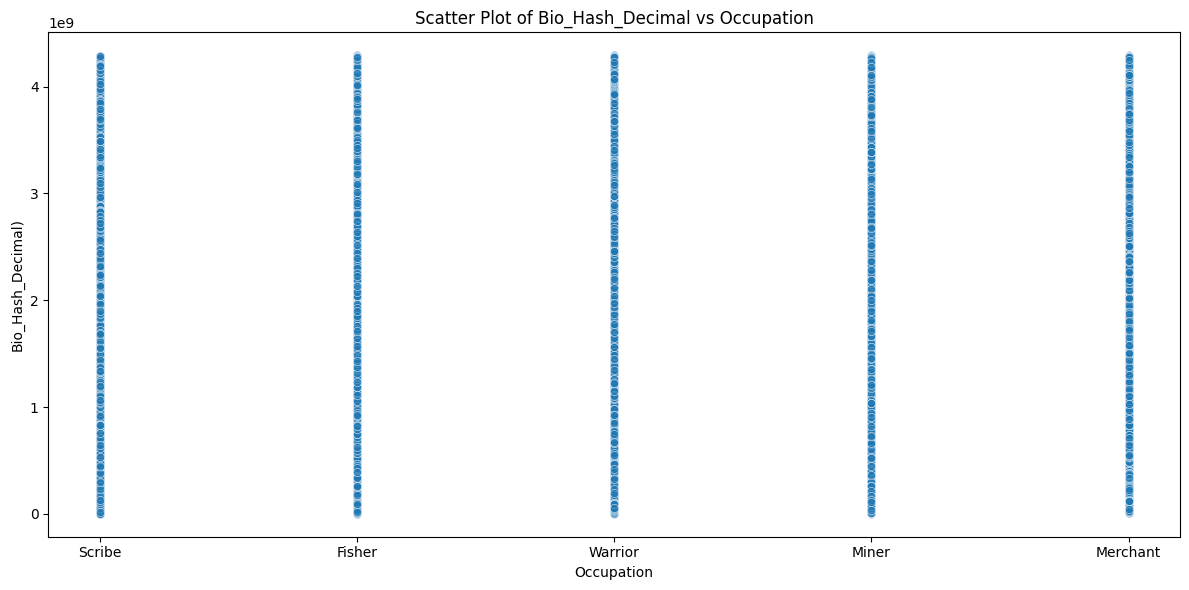

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Occupation', y='Bio_Hash_Decimal', alpha=0.7)
plt.title('Scatter Plot of Bio_Hash_Decimal vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Bio_Hash_Decimal)')
plt.tight_layout()
plt.show()


It is clear from the plot that there is no significance of bio_hash values with respect to occupation, since in each category there is an almost equal distribution of people of all bio_hash value ranges

In [24]:
#studying the relation between diet_type and life expectancy
plt.bar

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

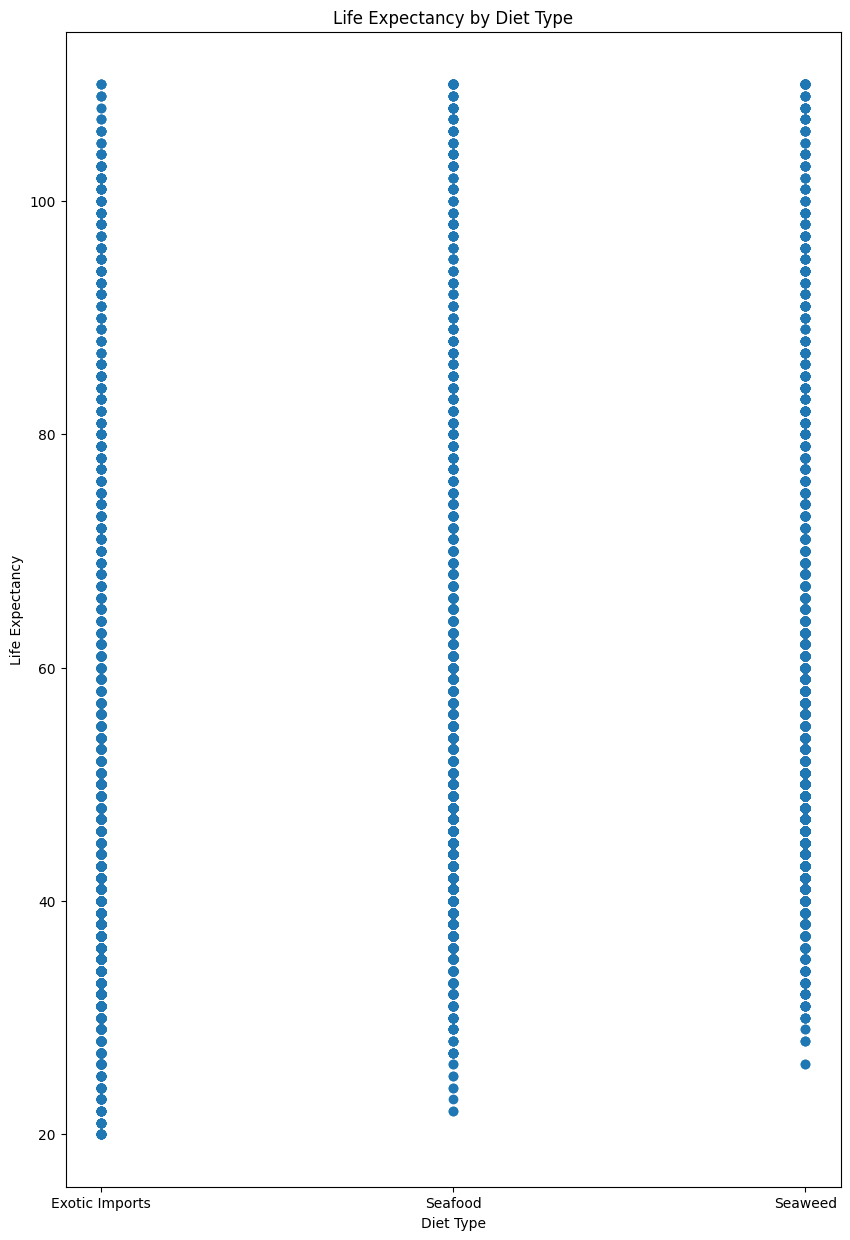

In [25]:
plt.figure(figsize=(10,15))
plt.scatter(data=df_not_nan, x='Diet_Type', y='Life_Expectancy')
plt.title('Life Expectancy by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Life Expectancy')

plt.show()


The data is almost equally distributed across all diet types. However, when observed closely, it is seen that the minimum life expectancy is higher in the seaweed column as compared to exotic imports. This may or may not be directly due to the diet type and may be influenced by other factors as well, about which definite conclusions cannot be drawn. But it clear that there are more people with diet type as exotic imports dying at younger ages. 

        Diet_Type  Life_Expectancy
0  Exotic Imports        47.018711
1         Seafood        53.415712
2         Seaweed        55.334637


C:\Users\medha\AppData\Local\Temp\ipykernel_25488\940269691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_diet_life, x='Diet_Type', y='Life_Expectancy', palette='viridis')


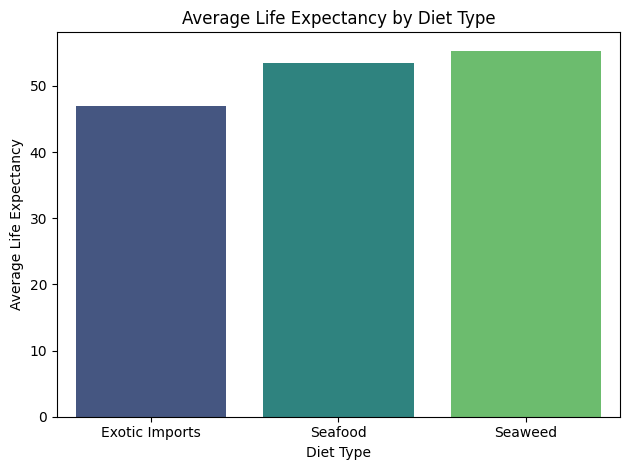

In [26]:
df_diet_life=df_not_nan.groupby('Diet_Type')['Life_Expectancy'].mean().reset_index()
print(df_diet_life.head())
sns.barplot(data=df_diet_life, x='Diet_Type', y='Life_Expectancy', palette='viridis')
plt.title('Average Life Expectancy by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Average Life Expectancy')
plt.tight_layout()
plt.show()

Although diet may not have a direct impact on life expectancy, the life_expectancy of an average citizen whose diet is exotic imports is approx. 8.3 years lesser than the life expectancy of an average citizen whose diet type is seaweed

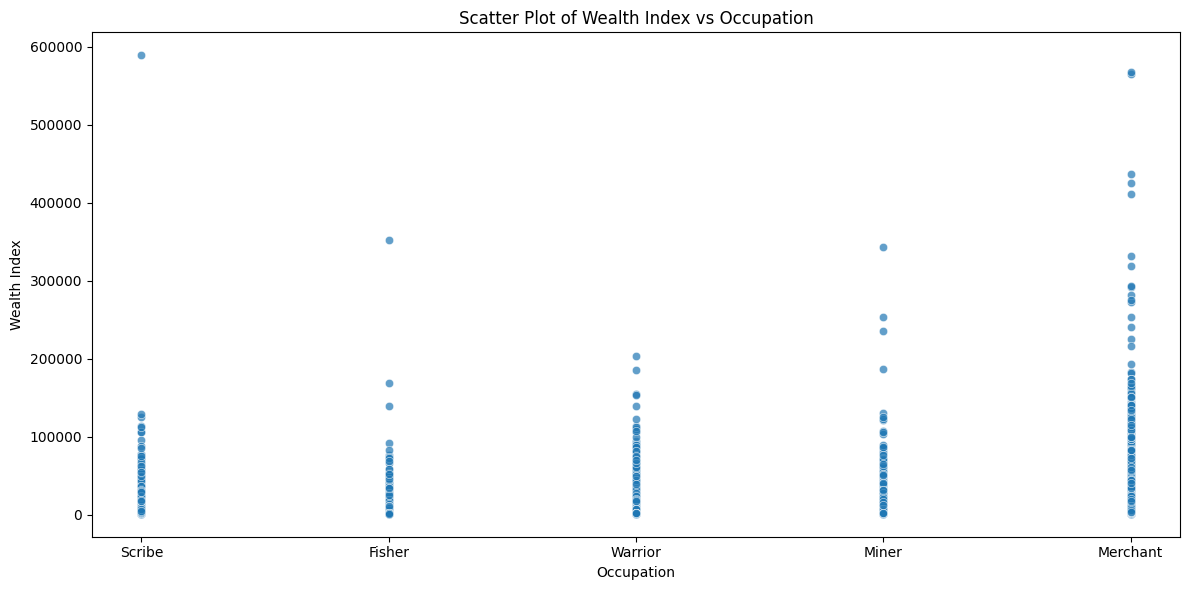

In [27]:
#analysing relation between occupation and wealth index
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Occupation', y='Wealth_Index', alpha=0.7)
plt.title('Scatter Plot of Wealth Index vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Wealth Index')
plt.tight_layout()
plt.show()


C:\Users\medha\AppData\Local\Temp\ipykernel_25488\4103978797.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean_occ = df_not_nan.groupby('Occupation', group_keys=False).apply(remove_outliers)


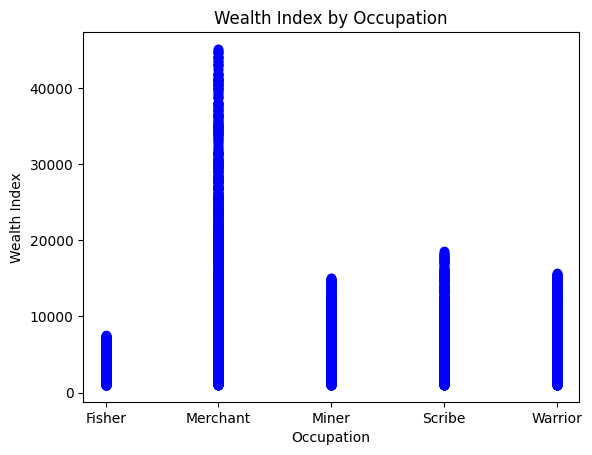

In [28]:
#outliers have to be removed
def remove_outliers(group):
    Q1 = group['Wealth_Index'].quantile(0.25)
    Q3 = group['Wealth_Index'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Wealth_Index'] >= lower) & (group['Wealth_Index'] <= upper)]

df_clean_occ = df_not_nan.groupby('Occupation', group_keys=False).apply(remove_outliers)
plt.scatter(df_clean_occ['Occupation'], df_clean_occ['Wealth_Index'], color='blue')
plt.xlabel("Occupation")
plt.ylabel("Wealth Index")
plt.title("Wealth Index by Occupation")
plt.show()

  Occupation  Wealth_Index
0     Fisher   2539.199491
1   Merchant  11242.705036
2      Miner   4147.146720
3     Scribe   5115.715508
4    Warrior   4396.351259


C:\Users\medha\AppData\Local\Temp\ipykernel_25488\3558918984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_wealth_occ, x='Occupation', y='Wealth_Index', palette='viridis')


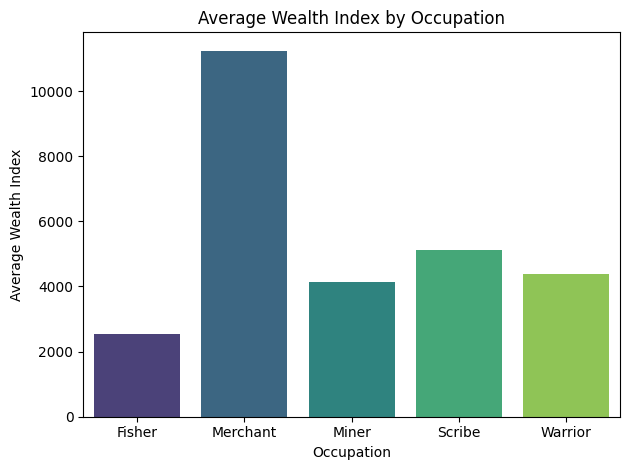

In [29]:
df_wealth_occ = df_clean_occ.groupby('Occupation')['Wealth_Index'].mean().reset_index()
print(df_wealth_occ.head())
sns.barplot(data=df_wealth_occ, x='Occupation', y='Wealth_Index', palette='viridis')
plt.title('Average Wealth Index by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Wealth Index')
plt.tight_layout()
plt.show()

Thus it can be concluded that in general, merchants are the wealthiest in Atlantis, while the fishers are the poorest/ The wealth index of an average merchant is approximately 4.4 times that of a fisher

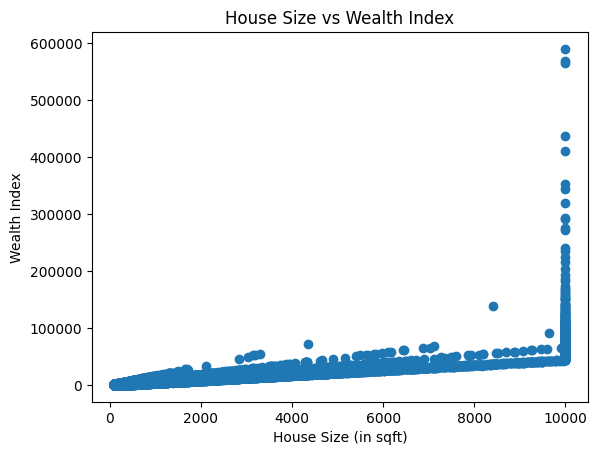

In [30]:
#analysing the relation between house size and wealth index
plt.scatter(data = df_not_nan, x='House_Size_sq_ft', y='Wealth_Index')
plt.xlabel('House Size (in sqft)')
plt.ylabel('Wealth Index')
plt.title("House Size vs Wealth Index")
plt.show()

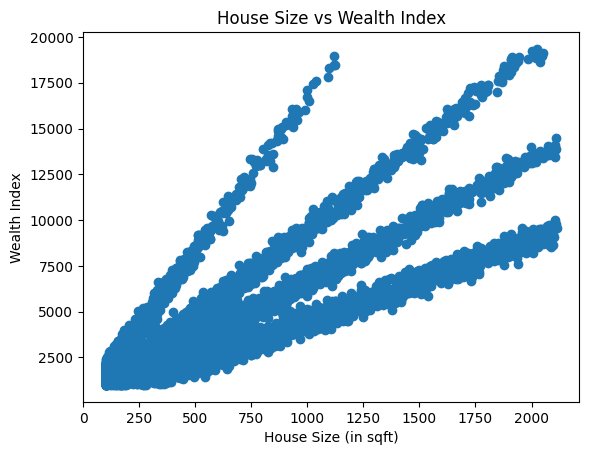

In [31]:
#there are many outliers in the plot, which we have to remove
def remove_outliers_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
house_wealth_clean = remove_outliers_column(df_not_nan, 'Wealth_Index')
house_wealth_clean = remove_outliers_column(house_wealth_clean, 'House_Size_sq_ft')
plt.scatter(data=house_wealth_clean, y='Wealth_Index', x='House_Size_sq_ft')
plt.ylabel('Wealth Index')
plt.xlabel('House Size (in sqft)')
plt.title('House Size vs Wealth Index')
plt.show()

This plot is quite unusual. But a clear linear relationship is seen between wealth index and house size, and there are clearly 4 distinct lines. This may be due to difference in districts (Larger house in a city would be more expensive than in a small town). To confirm these speculations, we can introduce the district factor into this plot, and create a 3 dimensional data plot

In [32]:
!pip install scikit-learn

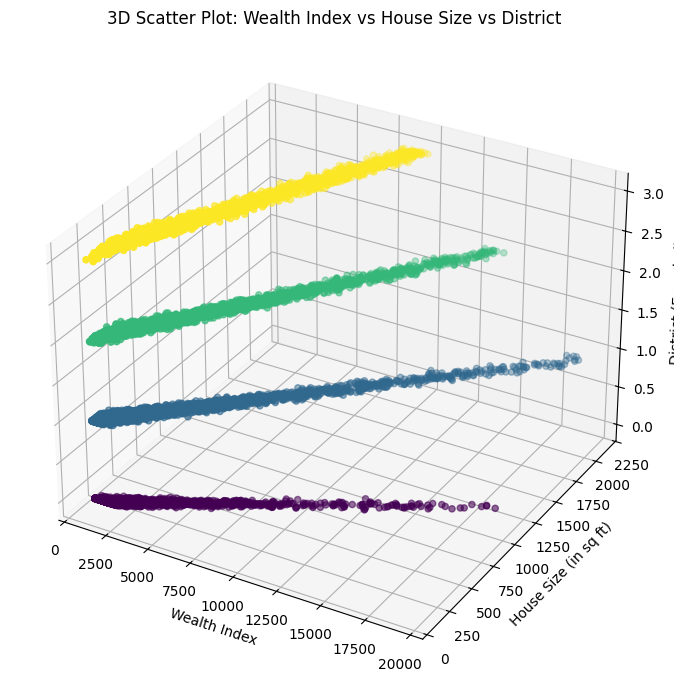

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

#we use the method of label encoding here to make the analysis easier. Thus we assign a unique integer value (0 to 3) to each district
house_wealth_clean['District_Code'] = LabelEncoder().fit_transform(house_wealth_clean['District_Name'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(house_wealth_clean['Wealth_Index'], house_wealth_clean['House_Size_sq_ft'], house_wealth_clean['District_Code'],
           c=house_wealth_clean['District_Code'], cmap='viridis')
ax.set_xlabel('Wealth Index')
ax.set_ylabel('House Size (in sq ft)')
ax.set_zlabel('District (Encoded)')
plt.title('3D Scatter Plot: Wealth Index vs House Size vs District')
plt.tight_layout()
plt.show()



Thus its clear from the above 3D plot that in each district, the house size increases almost linearly with the wealth index, although the rate of change varies with districts

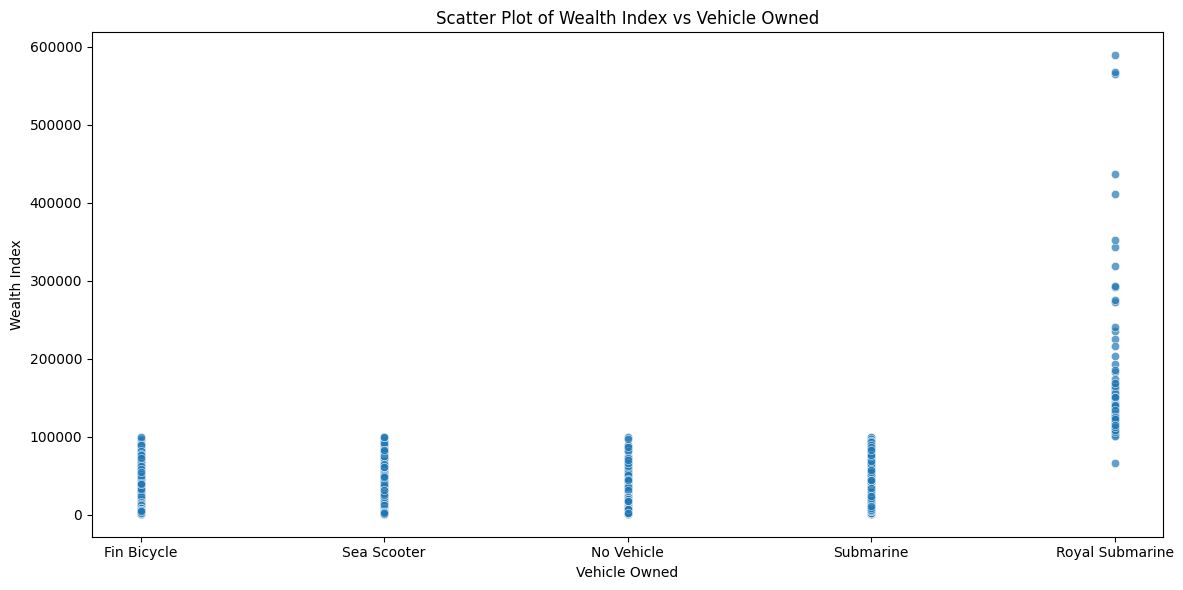

In [34]:
#analysing the relation between the wealth index and vehicle owned
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_not_nan, x='Vehicle_Owned', y='Wealth_Index', alpha=0.7)
plt.title('Scatter Plot of Wealth Index vs Vehicle Owned')
plt.xlabel('Vehicle Owned')
plt.ylabel('Wealth Index')
plt.tight_layout()
plt.show()

C:\Users\medha\AppData\Local\Temp\ipykernel_25488\1611863312.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean_vehicle = df_not_nan.groupby('Vehicle_Owned', group_keys=False).apply(remove_outliers)


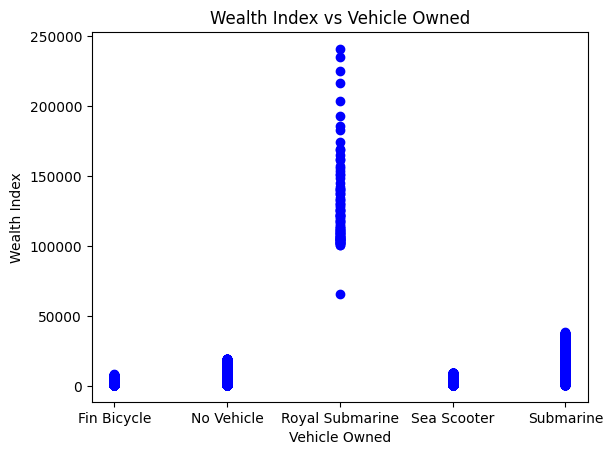

In [35]:
#the plot shows global outliers which have to be removed
def remove_outliers(group):
    Q1 = group['Wealth_Index'].quantile(0.25)
    Q3 = group['Wealth_Index'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Wealth_Index'] >= lower) & (group['Wealth_Index'] <= upper)]

df_clean_vehicle = df_not_nan.groupby('Vehicle_Owned', group_keys=False).apply(remove_outliers)
plt.scatter(df_clean_vehicle['Vehicle_Owned'], df_clean_vehicle['Wealth_Index'], color='blue')
plt.xlabel("Vehicle Owned")
plt.ylabel("Wealth Index")
plt.title("Wealth Index vs Vehicle Owned")
plt.show()

From the above scatter plot it is clear that Royal Submarine is a vehicle owned only by the wealthier citizens of Atlantis (no citizens with wealth index below 50000 own Royal Submarine).
The poorer citizens either have no vehicles or own fin bicycles or sea scooters. The middle class citises seem to own submarines. Another interesting point to note is that all citizens who can afford a royal submarine (wealth index > 50000) do not opt for other vehicles, thus Royal Submarine is the most preferred vehicle in Atlantis

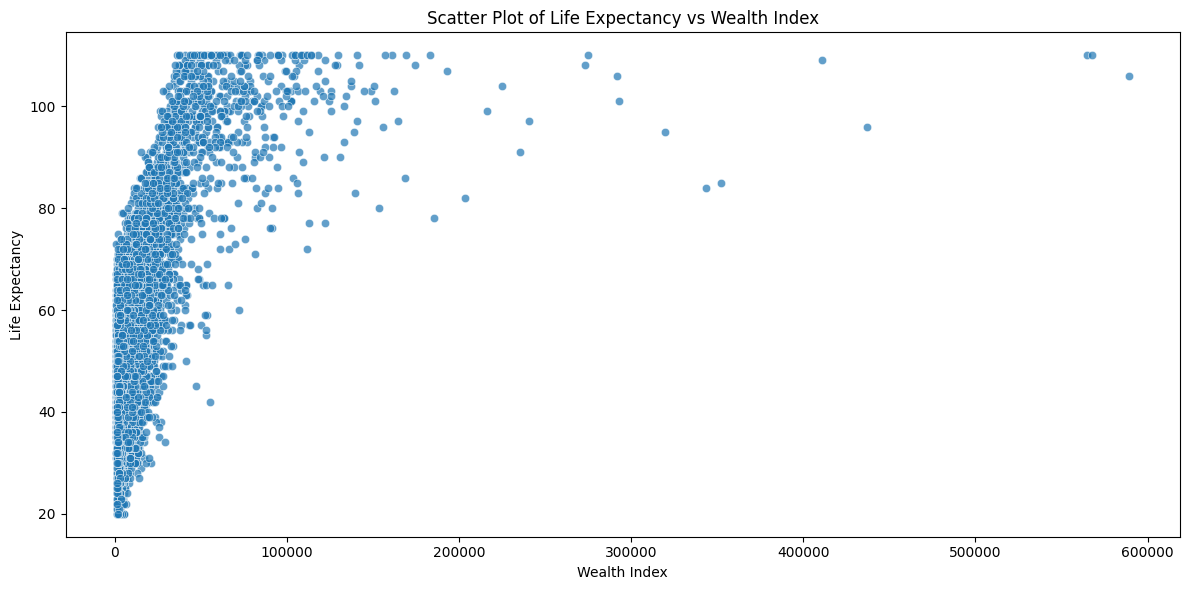

In [36]:
#analysing the relation wealth index and life expectancy
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_not_nan, x='Wealth_Index', y='Life_Expectancy', alpha=0.7)
plt.title('Scatter Plot of Life Expectancy vs Wealth Index')
plt.xlabel('Wealth Index')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

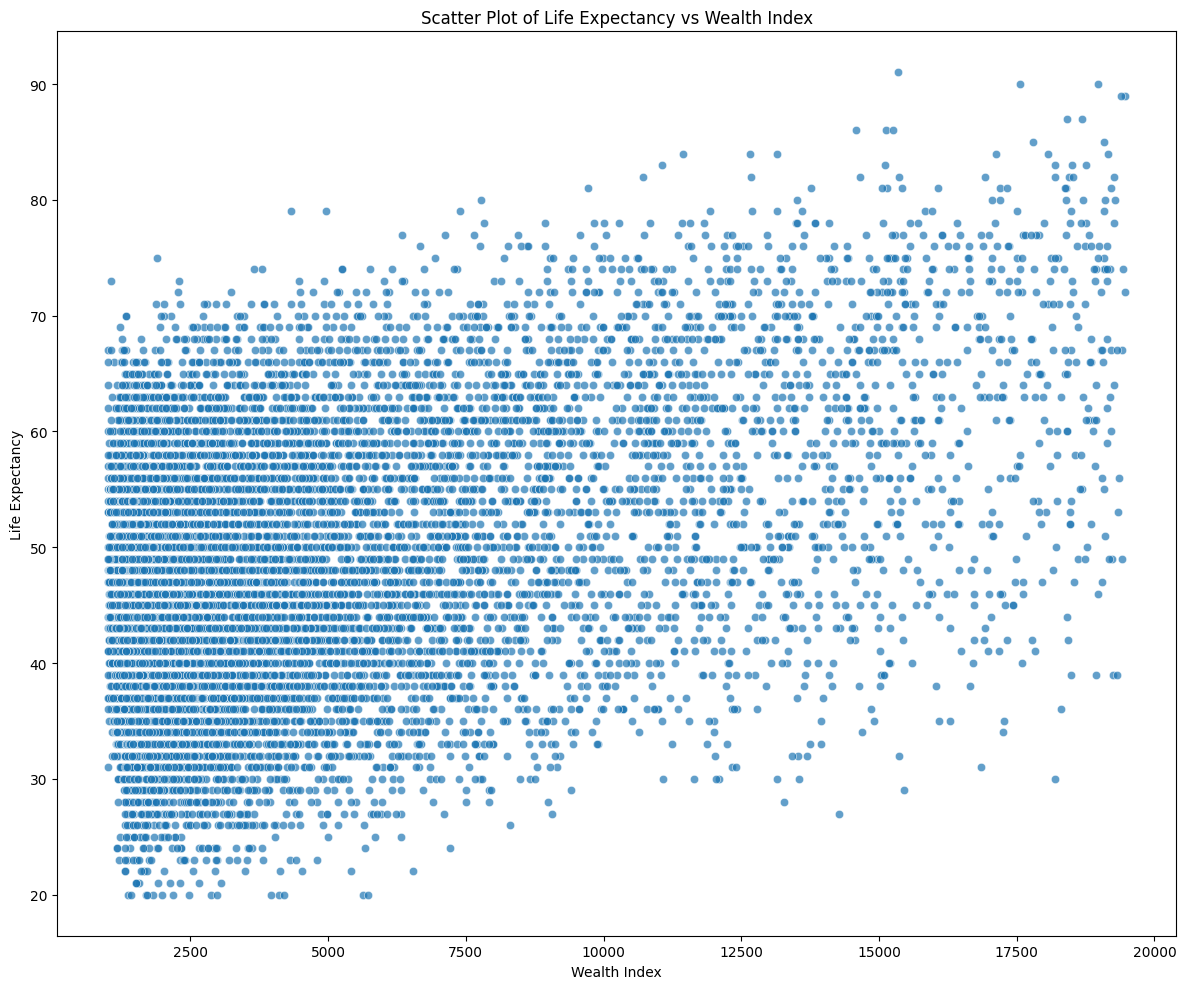

In [37]:
#wealth index column seems to have many outliers, so we need to remove the outliers.
def remove_outliers_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
wealth_clean = remove_outliers_column(df_not_nan, 'Wealth_Index')
plt.figure(figsize=(12,10))
sns.scatterplot(data=wealth_clean, x='Wealth_Index', y='Life_Expectancy', alpha=0.7)
plt.title('Scatter Plot of Life Expectancy vs Wealth Index')
plt.xlabel('Wealth Index')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

No conclusion can be drawn from this. We can try adding more parameters and make it a 3D plot, in order to draw conclusions

C:\Users\medha\AppData\Local\Temp\ipykernel_25488\4064274882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_clean['District_Code'] = LabelEncoder().fit_transform(wealth_clean['District_Name'])


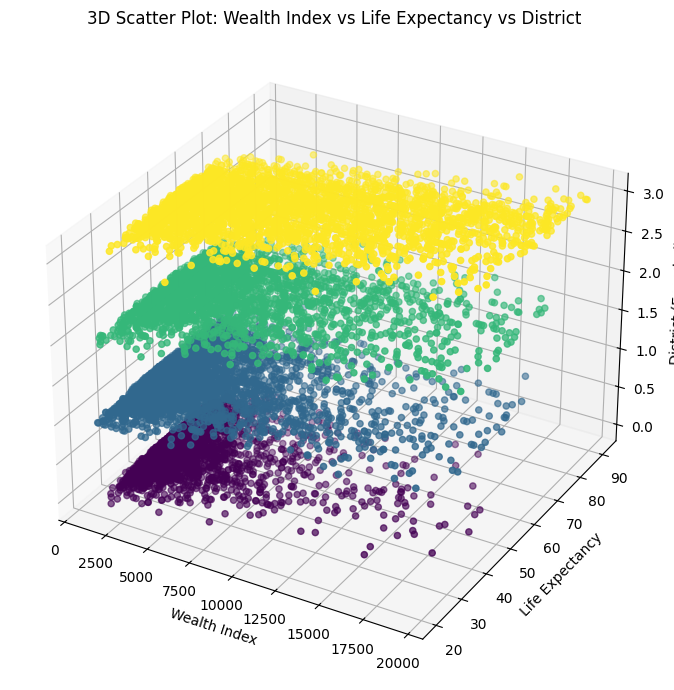

In [38]:
#let us try adding district factor
wealth_clean['District_Code'] = LabelEncoder().fit_transform(wealth_clean['District_Name'])

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wealth_clean['Wealth_Index'], wealth_clean['Life_Expectancy'], wealth_clean['District_Code'],
           c=wealth_clean['District_Code'], cmap='viridis')
ax.set_xlabel('Wealth Index')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('District (Encoded)')
plt.title('3D Scatter Plot: Wealth Index vs Life Expectancy vs District')
plt.tight_layout()
plt.show()

C:\Users\medha\AppData\Local\Temp\ipykernel_25488\2373036713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_clean['Diet_Code'] = LabelEncoder().fit_transform(wealth_clean['Diet_Type'])


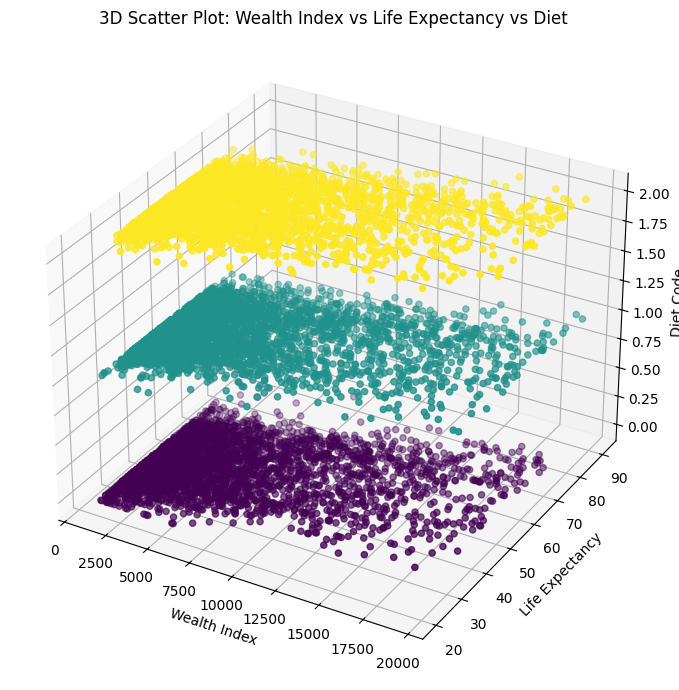

In [39]:
#trying to find relation by adding diet_type factor
wealth_clean['Diet_Code'] = LabelEncoder().fit_transform(wealth_clean['Diet_Type'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wealth_clean['Wealth_Index'], wealth_clean['Life_Expectancy'], wealth_clean['Diet_Code'],
           c=wealth_clean['Diet_Code'], cmap='viridis')
ax.set_xlabel('Wealth Index')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Diet Code')
plt.title('3D Scatter Plot: Wealth Index vs Life Expectancy vs Diet')
plt.tight_layout()
plt.show()

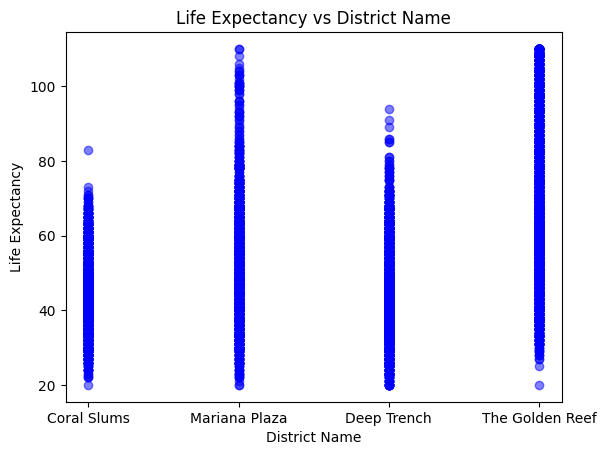

In [40]:
#analysing relation between life expectancy and distrcit
plt.scatter(df_not_nan['District_Name'], df_not_nan['Life_Expectancy'], color='blue', alpha=0.5)
plt.xlabel("District Name")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs District Name")
plt.show()

In [41]:
district_life = wealth_clean.groupby('District_Name')['Life_Expectancy'].mean().reset_index()
district_life.head()

,District_Name,Life_Expectancy
0,Coral Slums,44.093175
1,Deep Trench,43.237202
2,Mariana Plaza,49.603935
3,The Golden Reef,56.564593


Although the district does not directly impact the life expectancy, it is seen that the life expectancy of an average citizen varies with districts. The life expectancy of an average citizen of The Golden Reef is almost 13.3 years more than that of an average citizen in Deep Trench. The minimum life expectancy is higher in The Golden Reef as compared to other districts. Coral Slums has the lowest maximum life expectancy, with only one person having life expectancy greater than 80. The Golden Reef has the maximum number of people with life expectancy greater than 100 in comparision to other districts. 

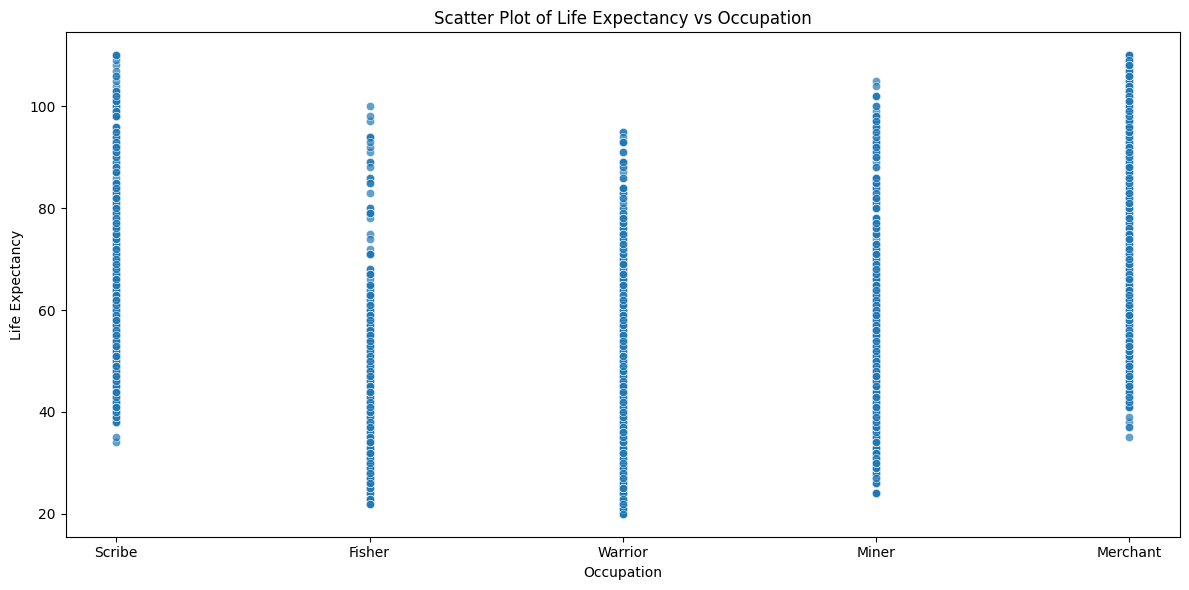

In [42]:
#relation of occupation with every parameter
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_not_nan, x='Occupation', y='Life_Expectancy', alpha=0.7)
plt.title('Scatter Plot of Life Expectancy vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

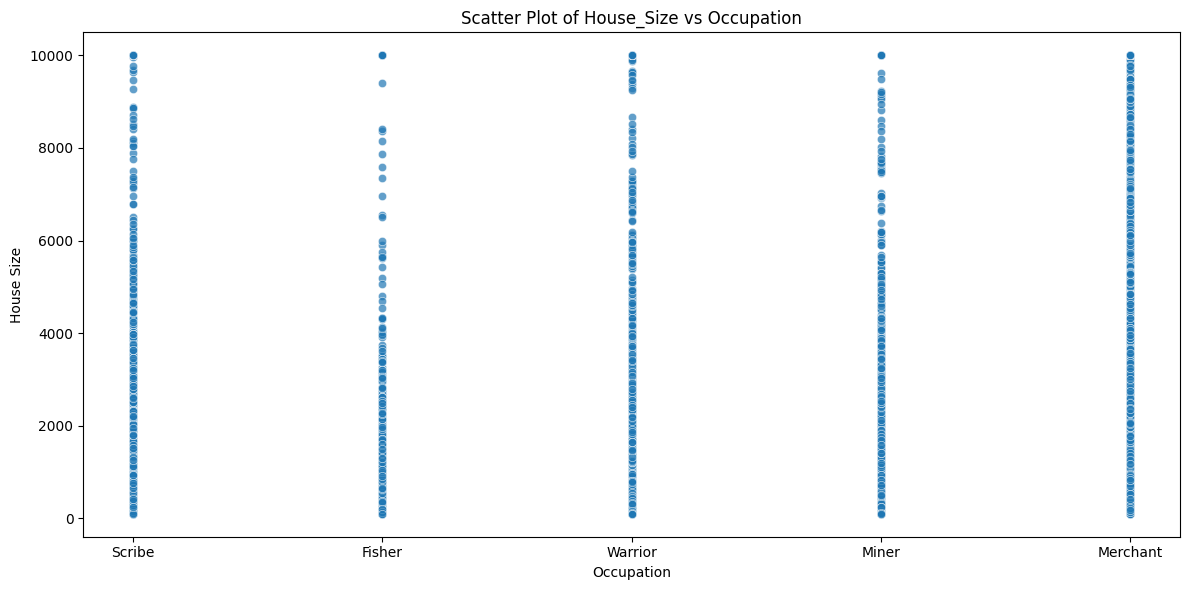

In [44]:
#relation of occupation with every parameter
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_not_nan, x='Occupation', y='House_Size_sq_ft', alpha=0.7)
plt.title('Scatter Plot of House_Size vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('House Size')
plt.tight_layout()
plt.show()

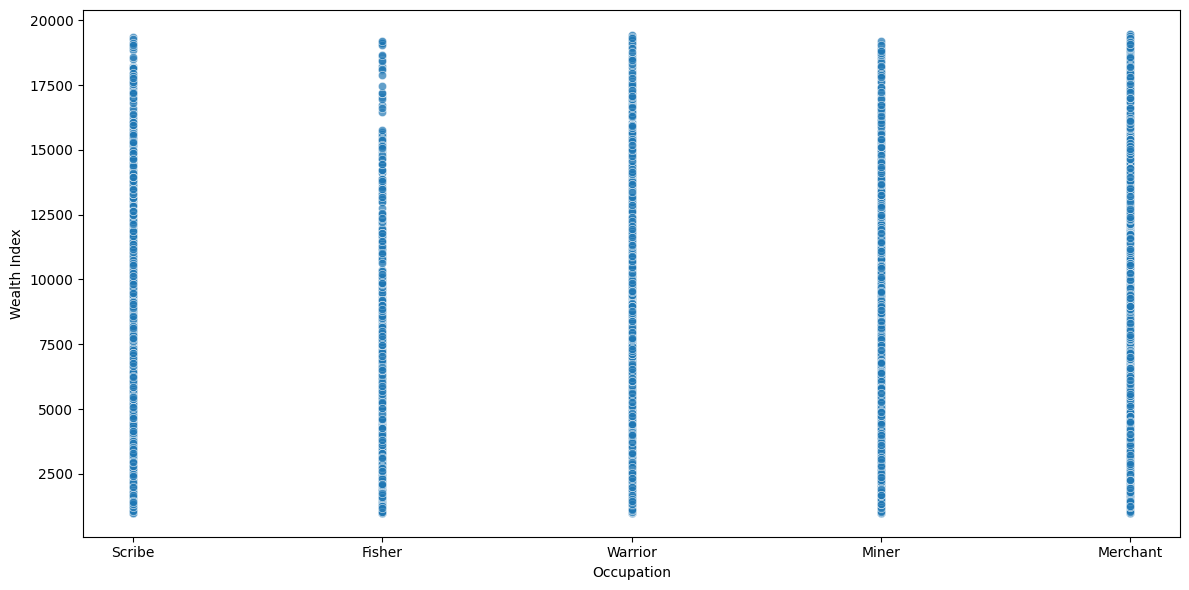

In [46]:
#relation of occupation with every parameter
plt.figure(figsize=(12,6))
sns.scatterplot(data=wealth_clean, x='Occupation', y='Wealth_Index', alpha=0.7)
plt.xlabel('Occupation')
plt.ylabel('Wealth Index')
plt.tight_layout()
plt.show()